Questions:

???????????????????????????????????

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('full_data.csv', engine= 'python')
#df.columns
#max(df['phenocluster'])

In [2]:
from pandas.api.types import is_numeric_dtype

for c in df.columns[1:]:
    if not is_numeric_dtype(df[c]):
        #print(c)
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

ValueError: could not convert string to float: 'Stroma'

In [120]:
dfn = df._get_numeric_data()
normalized_df=(dfn-dfn.min())/(dfn.max()-dfn.min())
normalized_df.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
0,0.000000,0.262338,0.410853,0.031109,0.004701,0.048433,0.058753,0.080901,0.032386,0.029771,...,0.008621,0.818182,0.456,0.456,0.666667,0.666667,0.321439,0.234739,0.321917,0.235586
1,0.000032,0.046753,0.100775,0.031483,0.008209,0.039180,0.065552,0.080043,0.036230,0.022762,...,0.181818,0.818182,0.456,0.456,0.666667,0.666667,0.261608,0.235745,0.261283,0.236612
2,0.000064,0.187013,0.162791,0.031358,0.003143,0.033501,0.047563,0.080923,0.033464,0.030836,...,0.000000,0.818182,0.456,0.456,0.666667,0.666667,0.053969,0.235384,0.054324,0.236109
3,0.000096,0.202597,0.217054,0.031257,0.016530,0.048767,0.070238,0.077140,0.032372,0.029797,...,0.010753,0.227273,0.456,0.456,0.666667,0.666667,0.116077,0.236524,0.115443,0.236223
4,0.000128,0.062338,0.124031,0.031078,0.000000,0.022990,0.069749,0.074626,0.028588,0.029350,...,0.000000,0.818182,0.456,0.456,0.666667,0.666667,0.151994,0.235464,0.152614,0.236080


In [122]:
df['Status.simple'].value_counts()

Uninflamed    180424
Inflamed      115405
Dysplastic     98303
Name: Status.simple, dtype: int64

In [125]:
mask = df['Status.simple'] == 'Dysplastic'
df1 = normalized_df[mask]
df1.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
0,0.000000,0.262338,0.410853,0.031109,0.004701,0.048433,0.058753,0.080901,0.032386,0.029771,...,0.008621,0.818182,0.456,0.456,0.666667,0.666667,0.321439,0.234739,0.321917,0.235586
1,0.000032,0.046753,0.100775,0.031483,0.008209,0.039180,0.065552,0.080043,0.036230,0.022762,...,0.181818,0.818182,0.456,0.456,0.666667,0.666667,0.261608,0.235745,0.261283,0.236612
2,0.000064,0.187013,0.162791,0.031358,0.003143,0.033501,0.047563,0.080923,0.033464,0.030836,...,0.000000,0.818182,0.456,0.456,0.666667,0.666667,0.053969,0.235384,0.054324,0.236109
3,0.000096,0.202597,0.217054,0.031257,0.016530,0.048767,0.070238,0.077140,0.032372,0.029797,...,0.010753,0.227273,0.456,0.456,0.666667,0.666667,0.116077,0.236524,0.115443,0.236223
4,0.000128,0.062338,0.124031,0.031078,0.000000,0.022990,0.069749,0.074626,0.028588,0.029350,...,0.000000,0.818182,0.456,0.456,0.666667,0.666667,0.151994,0.235464,0.152614,0.236080


In [124]:
df[df['Status.simple'] == 'Dysplastic']['ImageNumber'].value_counts()

20210802_MBAA047_S2_R-2_D-S2_T14_R1       13921
20210801_MBAA047_S5_R-3_D-S5_T23_R1       11392
20210802_MBAA047_S2_R-1_D-S2_T11_R1        9400
20210804_MBAA47_S16_R-4_D-S16_T123_R2      9110
20210804_MBAA47_S16_R-6_D-S16_T123_R1a     7878
20210807_MBAA047_S4_R-3_D-S4_T24_R1        6070
20210806_MBAA047_S14_R-1_D-S14_T75_R1      5951
20210804_MBAA47_S16_R-5_D-S16_T123_R1b     5126
20210808_MBAA047_S8_R-8_D-S8_T40_R1        4531
20210808_MBAA047_S8_R-3_D-S8_T42_R3        4525
20210808_MBAA047_S8_R-4_D-S8_T42_R2        3956
20210804_MBAA47_S16_R-2_D-S16_T127_R2      3691
20200731_MBAA047_S11_R-4_D-S11_T59_R1      3630
20210808_MBAA047_S8_R-5_D-S8_T42_R1b       3131
20210804_MBAA47_S16_R-3_D-S16_T127_R1      3000
20210808_MBAA047_S8_R-6_D-S8_T42_R1a       2991
Name: ImageNumber, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

labels = np.array(df[['cx','cy']])
prefeatures = df.drop(['cx','cy', 'nx', 'ny'], axis=1)
features = np.array(prefeatures._get_numeric_data())
print(prefeatures._get_numeric_data().shape)
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size = 0.25)

(394132, 60)


In [7]:
df.head()

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,Status.simple,cx,cy,nx,ny
0,20200731_MBAA047_S11_R-4_D-S11_T59_R1,1,232,122,5.947691,0.012886,0.351471,0.496079,2.248913,2.969381,...,19,59,59,11,5,Dysplastic,587.344828,527.500000,588.008197,528.024590
1,20200731_MBAA047_S11_R-4_D-S11_T59_R1,2,66,42,5.952402,0.022504,0.284320,0.553487,2.244265,2.994011,...,19,59,59,11,5,Dysplastic,478.590909,529.742424,477.833333,530.309524
2,20200731_MBAA047_S11_R-4_D-S11_T59_R1,3,174,58,5.950830,0.008615,0.243112,0.401600,2.249032,2.976285,...,19,59,59,11,5,Dysplastic,101.166667,528.936782,101.775862,529.189655
3,20200731_MBAA047_S11_R-4_D-S11_T59_R1,4,186,72,5.949549,0.045315,0.353891,0.593056,2.228531,2.969286,...,6,59,59,11,5,Dysplastic,214.059140,531.478495,212.833333,529.444444
4,20200731_MBAA047_S11_R-4_D-S11_T59_R1,5,78,48,5.947296,0.000000,0.166837,0.588930,2.214907,2.945038,...,19,59,59,11,5,Dysplastic,279.346154,529.115385,280.375000,529.125000


In [8]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.utils._testing import ignore_warnings
# from sklearn.exceptions import ConvergenceWarning

# mlp = MLPRegressor(hidden_layer_sizes = (70,),activation = 'relu',max_iter=3000)
# mlp.fit(X_train,y_train)
# print(mlp.score(X_test, y_test)) 

In [261]:
from sklearn_som.som import SOM
col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
#col = ["Nucl_Area","GATA3_Nucl_Mean","Tbet_Nucl_Mean","FOXP3_Nucl_Mean","NFkB_Nucl_Mean","Ki67_Nucl_Mean","H3_Nucl_Mean","Ir193_Nucl_Mean", "nx", "ny"]
df2 = df1[col]
Som_M = 6
Som_N = 6
iris_som = SOM(m=Som_M, n=Som_N, dim=54)
iris_som.fit(np.array(df2),epochs=1000)
df2.shape

(98303, 54)

In [262]:
dfhold = df[df['Status.simple'] == 'Dysplastic']
df3 = df2[dfhold['ImageNumber'] == '20210801_MBAA047_S5_R-3_D-S5_T23_R1']
predictions = iris_som.predict(np.array(df3))
df3.shape

(11392, 54)

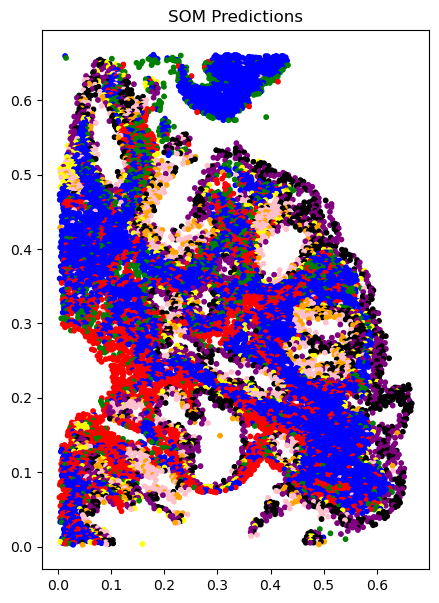

In [263]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1[dfhold['ImageNumber'] == '20210801_MBAA047_S5_R-3_D-S5_T23_R1']['cx']
y = df1[dfhold['ImageNumber'] == '20210801_MBAA047_S5_R-3_D-S5_T23_R1']['cy']
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'gray', 'orange', 'pink']

ax.scatter(x, y, c=predictions, cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()

In [264]:
dfn2 = normalized_df[df['ImageNumber'] == '20210801_MBAA047_S5_R-3_D-S5_T23_R1']
dfn2['predictions'] = predictions

C:\Users\Jan Super\AppData\Local\Temp\ipykernel_12024\734767447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn2['predictions'] = predictions


In [265]:
col = ["X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
dfn3 = dfn2.drop('predictions', axis=1)[col].iloc[0:0]
for i in range(Som_M*Som_N):
    mask = dfn2['predictions'] == i
    myList = []
    for column in dfn2.drop('predictions', axis=1)[mask][col]:
        myList.append(dfn2[mask][column].mean())
    dfn3.loc[len(dfn3)] = myList
dfn3[["PanKeratin_Mean", "Ecad_Mean"]].head(Som_M*Som_N)

,PanKeratin_Mean,Ecad_Mean
0,NaN,NaN
1,0.026499,0.062833
2,0.027390,0.057788
3,0.026493,0.069505
4,0.034603,0.089004
5,0.137938,0.194447
6,NaN,NaN
7,0.019405,0.032285
8,0.033682,0.069396
9,0.027190,0.089708


In [266]:
dfn3.head()

,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,RORgt_Mean,Ecad_Mean,CD20_Mean,...,CD3_Mean,pERK_Mean,Cleaved Caspase 3_Mean,ERK_Mean,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.285355,0.178692,0.402265,0.107832,0.305780,0.273849,0.272795,0.023291,0.062833,0.019589,...,0.039467,0.135391,0.046828,0.178317,0.043276,0.067971,0.389302,0.379010,0.074009,0.140990
2,0.285070,0.084370,0.278155,0.105048,0.305973,0.274032,0.272748,0.022842,0.057788,0.019275,...,0.042997,0.160985,0.049737,0.193353,0.044486,0.074944,0.397091,0.382965,0.078836,0.135211
3,0.285016,0.074714,0.263406,0.101776,0.306238,0.273811,0.272608,0.026860,0.069505,0.021724,...,0.067792,0.210029,0.071262,0.229109,0.054199,0.086798,0.430228,0.410683,0.093153,0.142593
4,0.285269,0.051768,0.201070,0.111503,0.308089,0.273153,0.271595,0.035827,0.089004,0.034424,...,0.224534,0.183729,0.091195,0.265104,0.067903,0.100132,0.468070,0.437770,0.133660,0.175633


In [267]:
for col in dfn3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]:
    string = col
    string += "-"
    count = 0
    for x in dfn3[col].tolist():
        if x - dfn3[col].mean() > dfn3[col].std()*0.75:
            string += str(count)
            string += "-"
        count = count + 1
    print(string)

PanKeratin_Mean-16-17-20-21-22-26-27-32-
Ecad_Mean-16-17-20-21-22-26-27-32-33-
aSMA_Mean-1-2-3-4-
CD45_Mean-4-5-9-10-11-
CD3_Mean-4-5-
CD68_Mean-4-5-9-10-11-
CD20_Mean-17-21-22-26-27-32-33-
CD4_Mean-4-5-
IL17a_Mean-5-7-9-10-


In [268]:
for col in dfn3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]:
    string = col
    string += "-"
    count = 0
    l = []
    for x in dfn3[col].tolist():
        if x - dfn3[col].mean() > dfn3[col].std()*0.75:
            string += str(count)
            string += "-"
            l.append(True)
        else:
            l.append(False)
        count = count + 1
    col += '_'    
    dfn3[col] = l

In [269]:
dfn3.head()

,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,RORgt_Mean,Ecad_Mean,CD20_Mean,...,Ir193_Nucl_Mean,PanKeratin_Mean_,Ecad_Mean_,aSMA_Mean_,CD45_Mean_,CD3_Mean_,CD68_Mean_,CD20_Mean_,CD4_Mean_,IL17a_Mean_
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,False
1,0.285355,0.178692,0.402265,0.107832,0.305780,0.273849,0.272795,0.023291,0.062833,0.019589,...,0.140990,False,False,True,False,False,False,False,False,False
2,0.285070,0.084370,0.278155,0.105048,0.305973,0.274032,0.272748,0.022842,0.057788,0.019275,...,0.135211,False,False,True,False,False,False,False,False,False
3,0.285016,0.074714,0.263406,0.101776,0.306238,0.273811,0.272608,0.026860,0.069505,0.021724,...,0.142593,False,False,True,False,False,False,False,False,False
4,0.285269,0.051768,0.201070,0.111503,0.308089,0.273153,0.271595,0.035827,0.089004,0.034424,...,0.175633,False,False,True,True,True,True,False,True,False


In [270]:
epithelium_mask = (dfn3['PanKeratin_Mean_'] == True) & (dfn3['Ecad_Mean_'] == True)
fibroblast_mask = dfn3['aSMA_Mean_'] == True
tcells_mask = (dfn3['CD45_Mean_'] == True) & (dfn3['CD3_Mean_'] == True)
macrophage_mask = (dfn3['CD45_Mean_'] == True) & (dfn3['CD68_Mean_'] == True)
bcells_mask = (dfn3['CD45_Mean_'] == True) & (dfn3['CD20_Mean_'] == True)
il17_mask1 = (dfn3['CD4_Mean_'] == True) & (dfn3['IL17a_Mean_'] == True)
il17_mask = tcells_mask&il17_mask1
masks = [epithelium_mask,fibroblast_mask,tcells_mask,macrophage_mask,bcells_mask,il17_mask]
labels = ['epithelium', 'fibroblasts', 'T-Cells', 'macrophage', 'B-Cells', 'IL17']

In [271]:
# mask = dfn2['predictions'] == 15
# cluster1 = dfn2[mask]
# cluster1[["IL17a_Mean"]].hist(bins = 30)
# dfn2[["IL17a_Mean"]].hist(bins = 30, alpha=0.5)

In [272]:
important_markers = [["PanKeratin_Mean", "Ecad_Mean"], # epithelium
                     ["aSMA_Mean"], #fibroblasts
                     ["CD45_Mean", "CD3_Mean"], # T-Cells
                     ["CD45_Mean", "CD68_Mean"], # macrophage
                     ["CD45_Mean", "CD20_Mean"], # B-Cells
                     ["CD45_Mean", "CD3_Mean", "CD4_Mean", "IL17a_Mean"] #IL17
                    ]

Cluster 0 = Epithelium \
cluster 2, 5 = Fibroblasts \
cluster 3, 6 = T-cells \
cluster 10, 11 = macrophage \
cluster 1 = B-Cells \
cluster 9 = IL17

<AxesSubplot:>

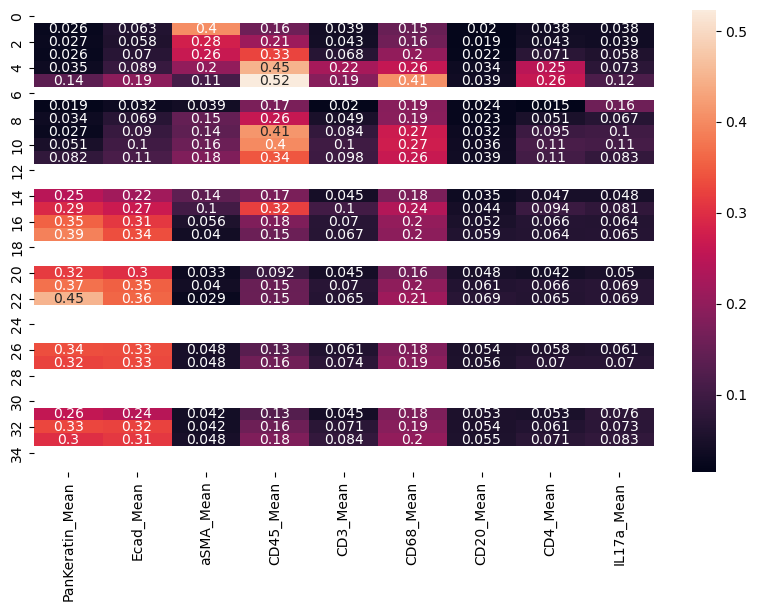

In [273]:
import seaborn as sns

important_markers = [["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]
plotMe = dfn3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]

for mask, label in zip(masks,labels):
    dfn3[label] = 0
    dfn3.loc[mask, label] = 1
    
plotlabel = dfn3[['epithelium', 'fibroblasts', 'T-Cells', 'macrophage', 'B-Cells', 'IL17']]

#print(dfn2['predictions'].value_counts())

sns.heatmap(plotMe, annot=True)

<AxesSubplot:>

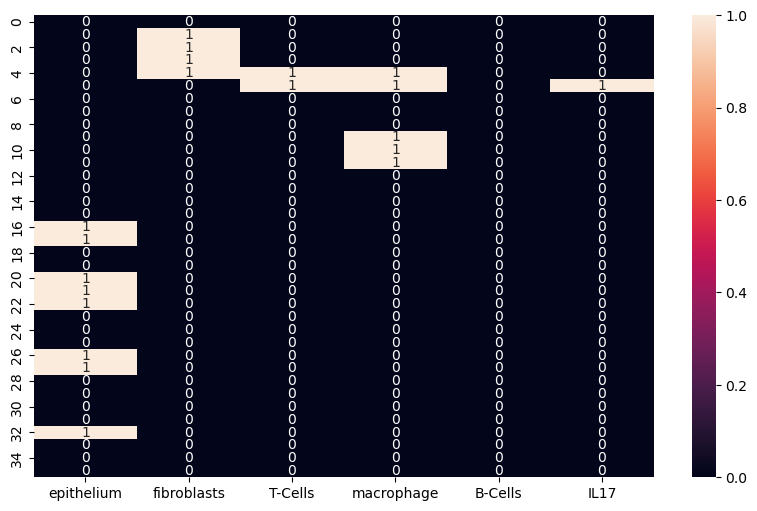

In [274]:
sns.heatmap(plotlabel, annot=True)

In [275]:
dfn3.head()

,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,RORgt_Mean,Ecad_Mean,CD20_Mean,...,CD68_Mean_,CD20_Mean_,CD4_Mean_,IL17a_Mean_,epithelium,fibroblasts,T-Cells,macrophage,B-Cells,IL17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,0,0,0,0,0,0
1,0.285355,0.178692,0.402265,0.107832,0.305780,0.273849,0.272795,0.023291,0.062833,0.019589,...,False,False,False,False,0,1,0,0,0,0
2,0.285070,0.084370,0.278155,0.105048,0.305973,0.274032,0.272748,0.022842,0.057788,0.019275,...,False,False,False,False,0,1,0,0,0,0
3,0.285016,0.074714,0.263406,0.101776,0.306238,0.273811,0.272608,0.026860,0.069505,0.021724,...,False,False,False,False,0,1,0,0,0,0
4,0.285269,0.051768,0.201070,0.111503,0.308089,0.273153,0.271595,0.035827,0.089004,0.034424,...,True,False,True,False,0,1,1,1,0,0


[0, 6, 7, 8, 12, 13, 14, 15, 18, 19, 23, 24, 25, 28, 29, 30, 31, 33, 34, 35]


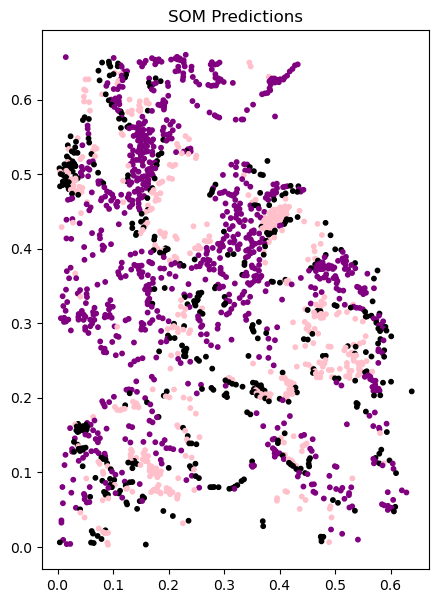

In [276]:
['epithelium', 'fibroblasts', 'T-Cells', 'macrophage', 'B-Cells', 'IL17']
unlabeled_mask1 = (dfn3['epithelium'] == 0) & (dfn3['fibroblasts'] == 0)
unlabeled_mask2 = (dfn3['T-Cells'] == 0) & (dfn3['macrophage'] == 0)
unlabeled_mask3 = (dfn3['B-Cells'] == 0) & (dfn3['IL17'] == 0)
unlabeled_mask4 = unlabeled_mask1 & unlabeled_mask2
unlabeled_mask = unlabeled_mask4 & unlabeled_mask3
dfn4 = dfn3[unlabeled_mask]
print(list(dfn4.index))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = dfn2[dfn2['predictions'].isin(list(dfn4.index))]['cx']
y = dfn2[dfn2['predictions'].isin(list(dfn4.index))]['cy']
colors = ['purple', 'black', 'gray', 'orange', 'pink']

ax.scatter(x, y, c=dfn2[dfn2['predictions'].isin(list(dfn4.index))]['predictions'], cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()

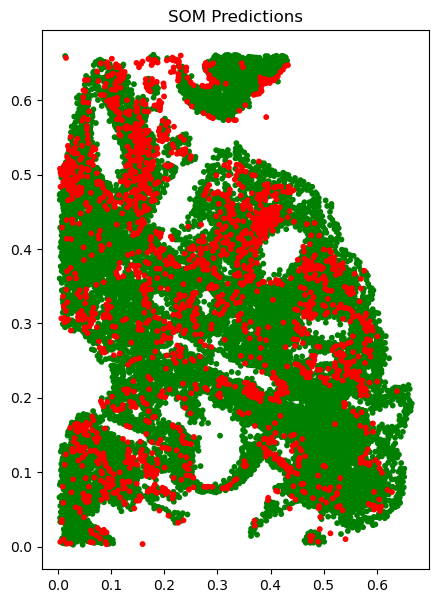

In [277]:
dfn5 = dfn3[~unlabeled_mask]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = dfn2[dfn2['predictions'].isin(list(dfn5.index))]['cx']
y = dfn2[dfn2['predictions'].isin(list(dfn5.index))]['cy']
colors = ['green']

ax.scatter(x, y, c=dfn2[dfn2['predictions'].isin(list(dfn5.index))]['predictions'], cmap=ListedColormap(colors), s=10)
x = dfn2[dfn2['predictions'].isin(list(dfn4.index))]['cx']
y = dfn2[dfn2['predictions'].isin(list(dfn4.index))]['cy']
colors = ['red']

ax.scatter(x, y, c=dfn2[dfn2['predictions'].isin(list(dfn4.index))]['predictions'], cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()